<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Iris

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [20]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [22]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

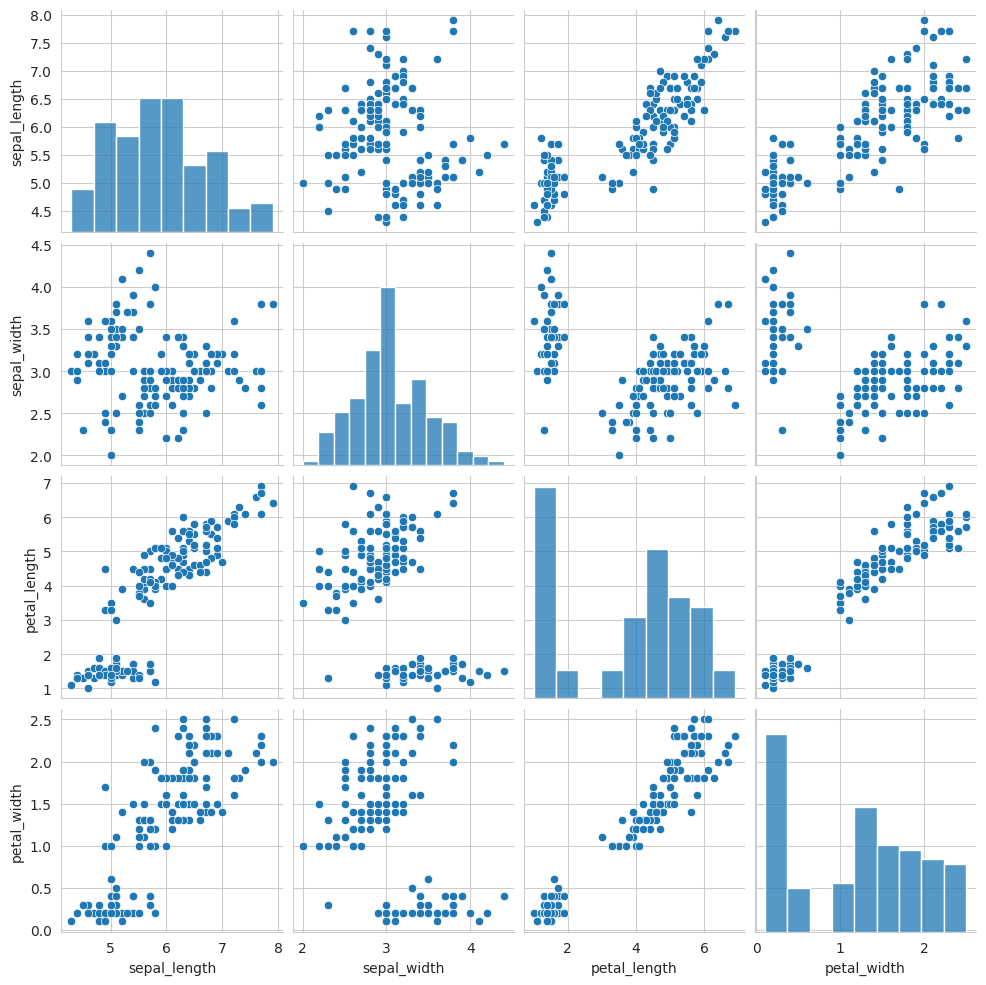

In [23]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** As características comprimento da pétala e largura da pétala mostram uma correlação positiva clara. À medida que o comprimento da pétala aumenta, a largura da pétala também tende a aumentar. Isso é visível no gráfico de dispersão correspondente, onde os pontos seguem uma linha ascendente.

## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [24]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Nao possui valores nulos ou faltantes.

### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [25]:
iris['sepal_length_std'] = iris['sepal_length'].apply(lambda valor: (valor - iris['sepal_length'].mean()) / iris['sepal_length'].std() )
iris['sepal_width_std'] = iris['sepal_width'].apply(lambda valor: (valor - iris['sepal_width'].mean()) / iris['sepal_width'].std() )
iris['petal_length_std'] = iris['petal_length'].apply(lambda valor: (valor - iris['petal_length'].mean()) / iris['petal_length'].std() )
iris['petal_width_std'] = iris['petal_width'].apply(lambda valor: (valor - iris['petal_width'].mean()) / iris['petal_width'].std() )

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,5.1,3.5,1.4,0.2,-0.897674,1.015602,-1.335752,-1.311052
1,4.9,3.0,1.4,0.2,-1.139200,-0.131539,-1.335752,-1.311052
2,4.7,3.2,1.3,0.2,-1.380727,0.327318,-1.392399,-1.311052
3,4.6,3.1,1.5,0.2,-1.501490,0.097889,-1.279104,-1.311052
4,5.0,3.6,1.4,0.2,-1.018437,1.245030,-1.335752,-1.311052


### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [26]:
iris.drop(["sepal_length","sepal_width","petal_length", "petal_width"], axis=1, inplace=True)


## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [ ]:
# resposta da questão 3.1

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Definir a lista wcss
wcss = []

# Treinar os modelos de k-médias e salvar o WCSS
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(iris)
    wcss.append(kmeans.inertia_)

### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

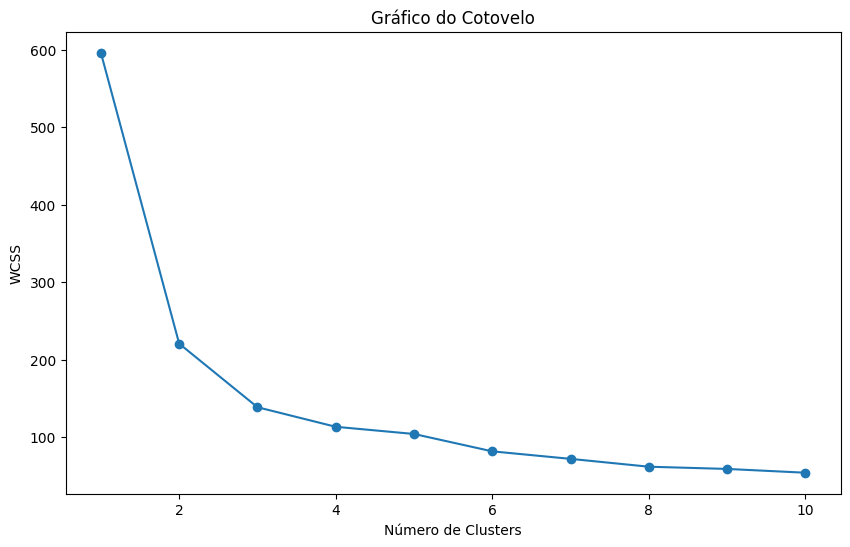

In [28]:
import matplotlib.pyplot as plt


# Plotar o valor de WCSS
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Gráfico do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [29]:
model_3 = KMeans(n_clusters=3)
model_3 = model_3.fit(iris)

In [30]:
model_3.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'auto',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['sepal_length_std', 'sepal_width_std', 'petal_length_std',
        'petal_width_std'], dtype=object),
 'n_features_in_': 4,
 '_tol': 9.933333333333334e-05,
 '_n_init': 1,
 '_algorithm': 'lloyd',
 '_n_threads': 1,
 'cluster_centers_': array([[ 1.06532176,  0.05740203,  0.96569807,  0.99896792],
        [-1.01119138,  0.85041372, -1.30063009, -1.25070352],
        [-0.07697634, -0.92751406,  0.32205924,  0.23648596]]),
 '_n_features_out': 3,
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
        2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,

In [31]:
clusters = model_3.labels_
clustered_iris_3 = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

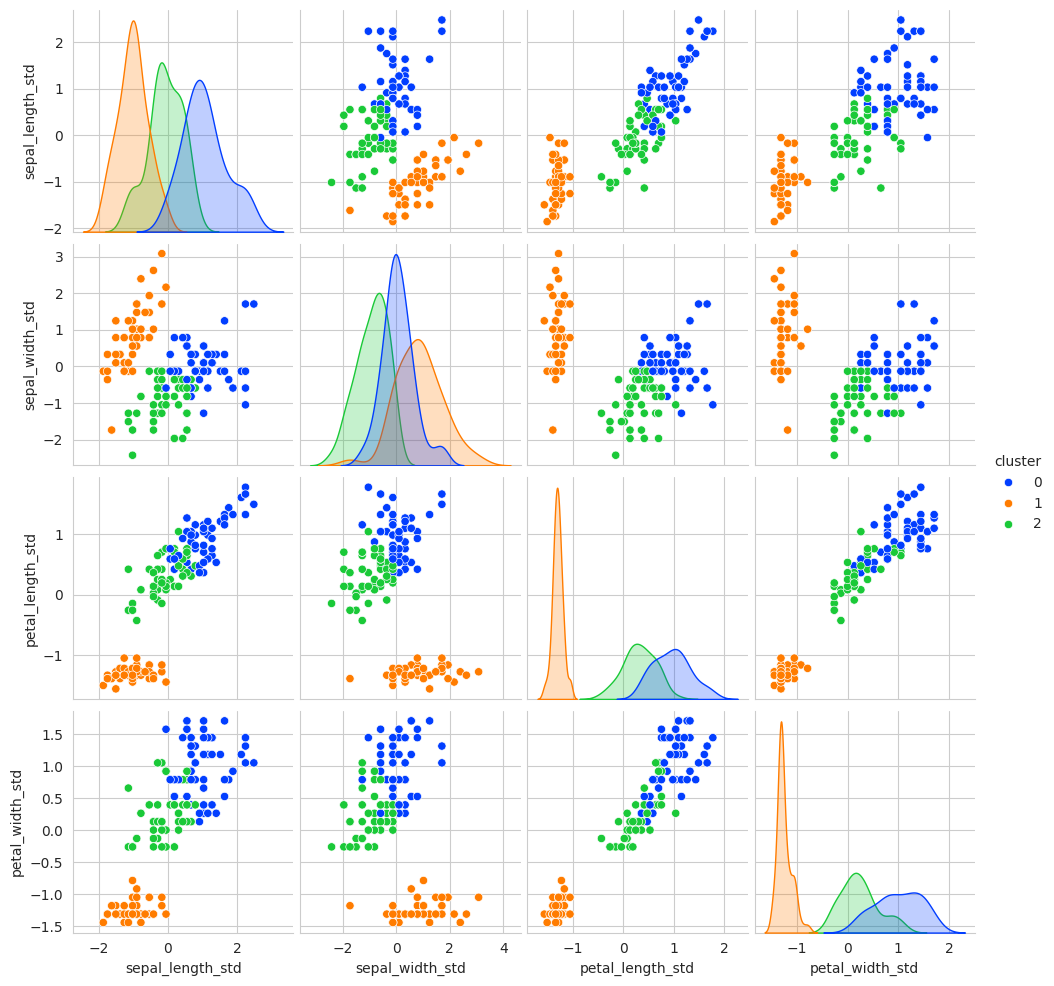

In [32]:
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=clustered_iris_3, hue='cluster', palette="bright")


**Comentário:** Com a formação de 3 clusters, é possível observar que as flores foram distintamente inseridas dentro do nosso conjunto de dados, conforme a análise inicialmente prevista.

## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [35]:
nova_flor = np.array([5.1, 3.5, 1.4, 0.2])
cluster_nova_flor = model_3.predict(nova_flor.reshape(1, -1))
print(cluster_nova_flor)


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


A nova flor pertence ao cluster 0.

---